A1.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv('structured_dataset.csv')

# Feature matrix
X = df[[f'feature_{i}' for i in range(1, 40)]].values

# Convert PPPF to binary classes using quantiles
df['PPPF_Class'] = pd.qcut(df['PPPF'], q=2, labels=[0, 1])
y = df['PPPF_Class'].astype(int).values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Train k-NN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# Confusion Matrices
print("\nConfusion Matrix - Train:")
print(confusion_matrix(y_train, y_train_pred))

print("\nConfusion Matrix - Test:")
print(confusion_matrix(y_test, y_test_pred))

# Classification Reports
print("\nClassification Report - Train:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report - Test:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.8285
Testing Accuracy: 0.6501

Confusion Matrix - Train:
[[7557  843]
 [2038 6361]]

Confusion Matrix - Test:
[[2759  841]
 [1678 1922]]

Classification Report - Train:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      8400
           1       0.88      0.76      0.82      8399

    accuracy                           0.83     16799
   macro avg       0.84      0.83      0.83     16799
weighted avg       0.84      0.83      0.83     16799


Classification Report - Test:
              precision    recall  f1-score   support

           0       0.62      0.77      0.69      3600
           1       0.70      0.53      0.60      3600

    accuracy                           0.65      7200
   macro avg       0.66      0.65      0.65      7200
weighted avg       0.66      0.65      0.65      7200



A2.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Load dataset
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="IRCTC Stock Price")

# --- Fix the Volume column ---
def convert_volume(val):
    val = str(val).strip()
    if val.endswith('M'):
        return float(val[:-1]) * 1_000_000
    elif val.endswith('K'):
        return float(val[:-1]) * 1_000
    else:
        return float(val)

df["Volume"] = df["Volume"].apply(convert_volume)

# Drop non-numeric columns and target
df = df.drop(columns=["Date", "Month", "Day", "Chg%"], errors="ignore")

# Define features and target
X = df.drop(columns=["Price"]).values
y = df["Price"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 164.1921
Root Mean Squared Error (RMSE): 12.8137
Mean Absolute Percentage Error (MAPE): 0.51%
R² Score: 0.9973


A3.

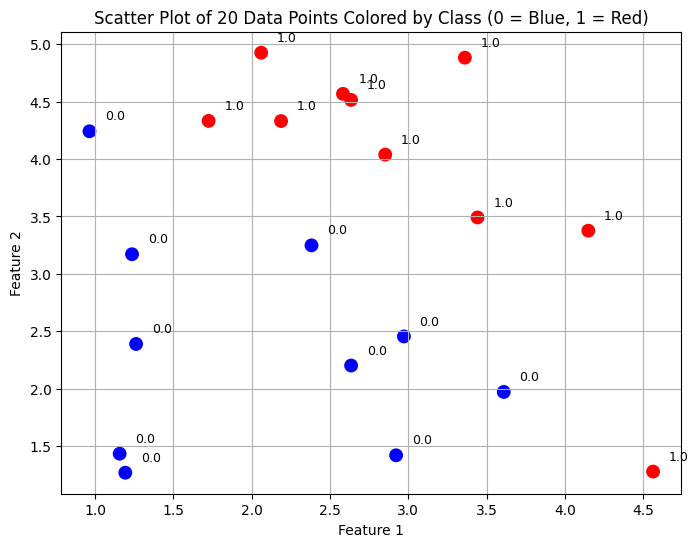

In [ ]:
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("structured_dataset.csv")

# Select two features (e.g., feature_1 and feature_2)
features = df[['feature_1', 'feature_2']].copy()

# Drop rows with missing values and randomly select 20 rows
features = features.dropna().sample(n=20, random_state=42).reset_index(drop=True)

# Assign class based on a rule (e.g., if feature_1 + feature_2 > threshold → class 1, else class 0)
threshold = features['feature_1'].mean() + features['feature_2'].mean()
features['Class'] = ((features['feature_1'] + features['feature_2']) > threshold).astype(int)

# Plotting
colors = features['Class'].map({0: 'blue', 1: 'red'})
plt.figure(figsize=(8, 6))
plt.scatter(features['feature_1'], features['feature_2'], c=colors, s=80)

for i, row in features.iterrows():
    plt.text(row['feature_1']+0.1, row['feature_2']+0.1, f"{row['Class']}", fontsize=9)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of 20 Data Points Colored by Class (0 = Blue, 1 = Red)")
plt.grid(True)
plt.show()

A4.

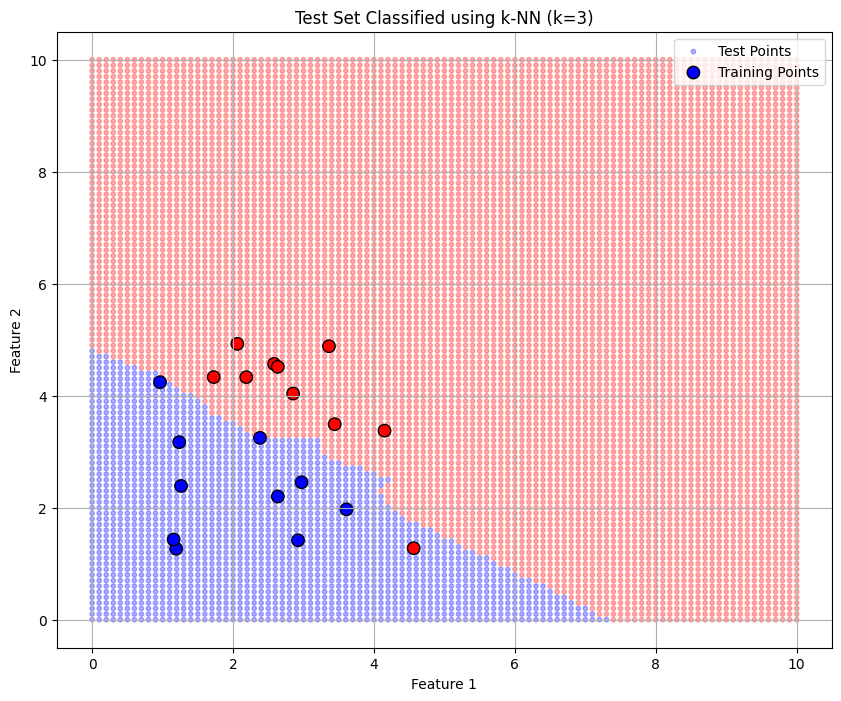

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df = pd.read_csv("structured_dataset.csv")

# Use feature_1 and feature_2, clean NaNs, sample 20 points
train_data = df[['feature_1', 'feature_2']].dropna().sample(n=20, random_state=42).reset_index(drop=True)

# Manually assign classes based on a threshold logic
threshold = train_data['feature_1'].mean() + train_data['feature_2'].mean()
train_data['Class'] = ((train_data['feature_1'] + train_data['feature_2']) > threshold).astype(int)

# Split into X_train and y_train
X_train = train_data[['feature_1', 'feature_2']].values
y_train = train_data['Class'].values

# Fit k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Generate test data grid (X and Y values from 0 to 10 with 0.1 steps)
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
xx, yy = np.meshgrid(x_values, y_values)
test_points = np.c_[xx.ravel(), yy.ravel()]

# Predict classes for the test points
predicted_classes = knn.predict(test_points)

# Plotting
plt.figure(figsize=(10, 8))

# Color test points by predicted class
plt.scatter(test_points[:, 0], test_points[:, 1], c=np.where(predicted_classes==0, 'blue', 'red'), alpha=0.3, s=10, label='Test Points')

# Overlay the training points for reference
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.where(y_train==0, 'blue', 'red'), edgecolors='black', s=80, label='Training Points')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Test Set Classified using k-NN (k=3)")
plt.legend()
plt.grid(True)
plt.show()

A5.

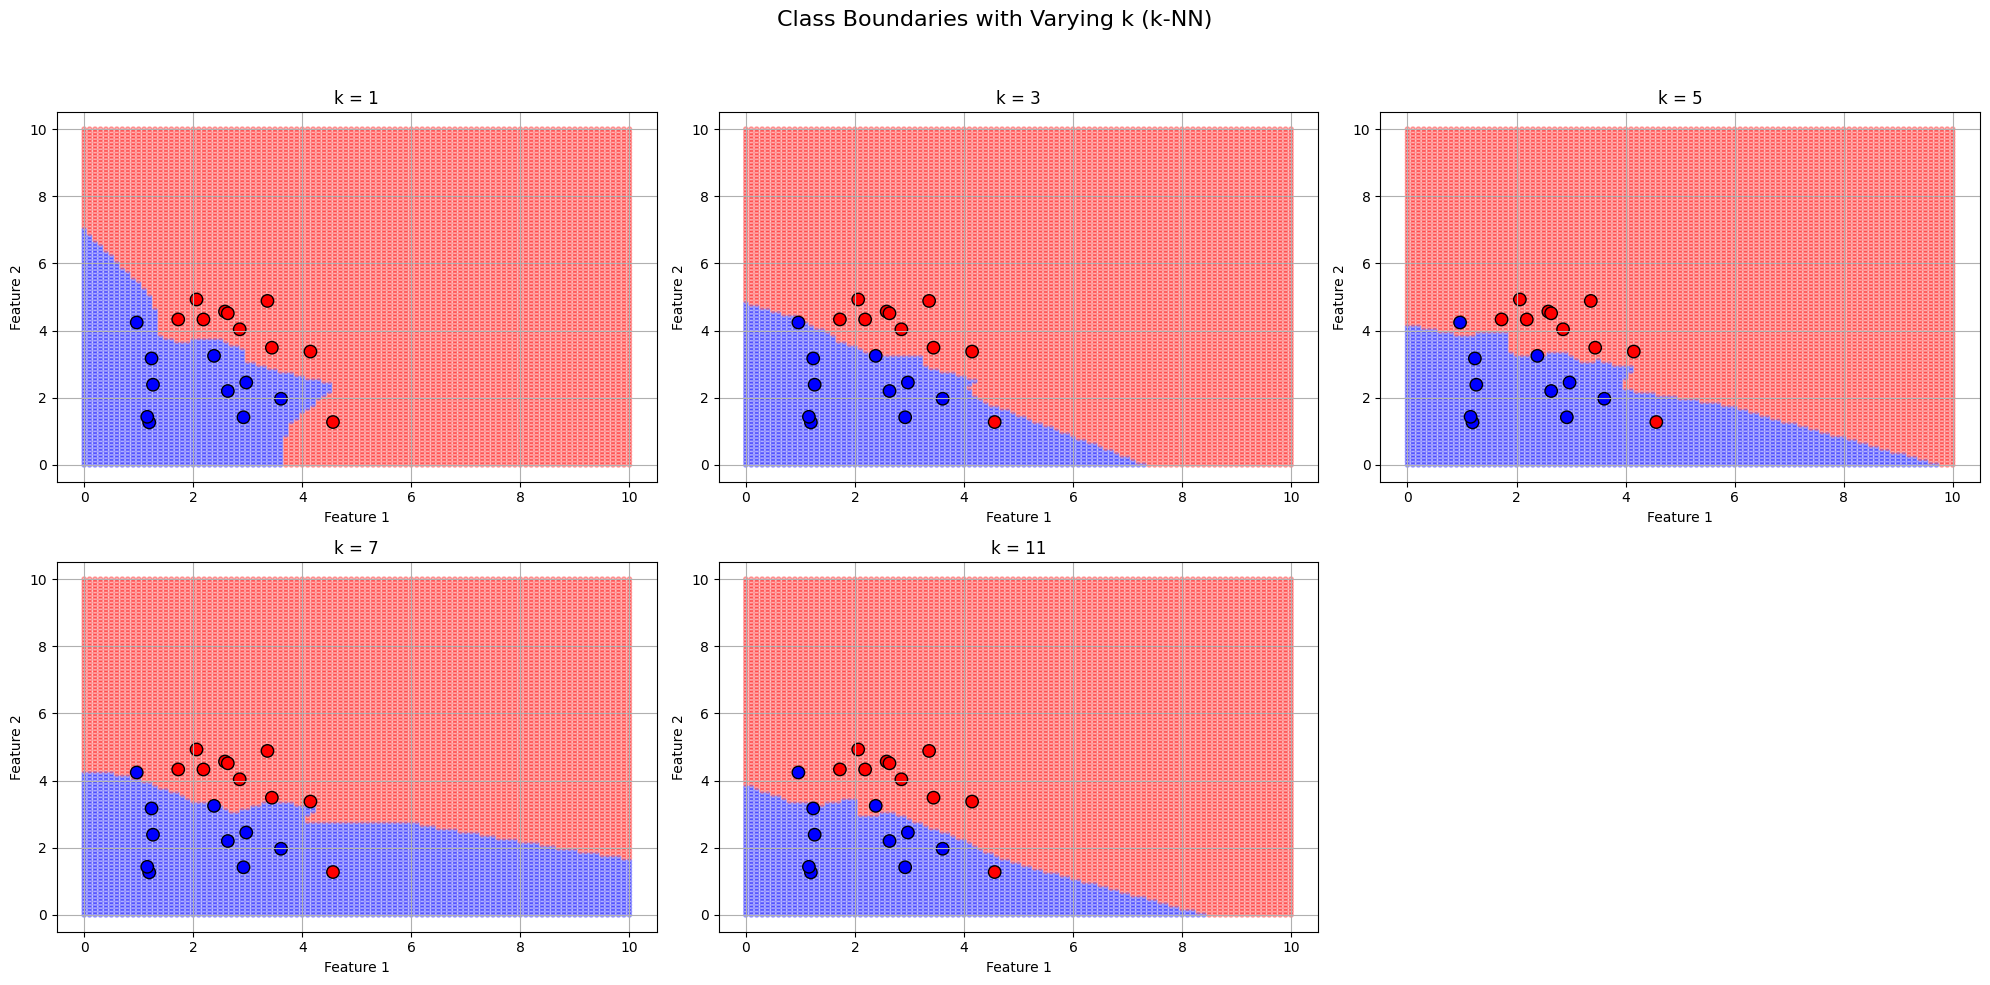

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df = pd.read_csv("structured_dataset.csv")

# Select two features and sample 20 points
train_data = df[['feature_1', 'feature_2']].dropna().sample(n=20, random_state=42).reset_index(drop=True)

# Assign classes based on sum threshold
threshold = train_data['feature_1'].mean() + train_data['feature_2'].mean()
train_data['Class'] = ((train_data['feature_1'] + train_data['feature_2']) > threshold).astype(int)

X_train = train_data[['feature_1', 'feature_2']].values
y_train = train_data['Class'].values

# Generate test data grid
x_vals = np.arange(0, 10.1, 0.1)
y_vals = np.arange(0, 10.1, 0.1)
xx, yy = np.meshgrid(x_vals, y_vals)
test_points = np.c_[xx.ravel(), yy.ravel()]

# Try different k values and visualize
k_values = [1, 3, 5, 7, 11]

plt.figure(figsize=(20, 10))
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_classes = knn.predict(test_points)

    plt.subplot(2, 3, i + 1)
    plt.scatter(test_points[:, 0], test_points[:, 1], c=np.where(pred_classes == 0, 'blue', 'red'), alpha=0.3, s=10)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=np.where(y_train == 0, 'blue', 'red'), edgecolors='black', s=80)
    plt.title(f"k = {k}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)

plt.suptitle("Class Boundaries with Varying k (k-NN)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

A6.

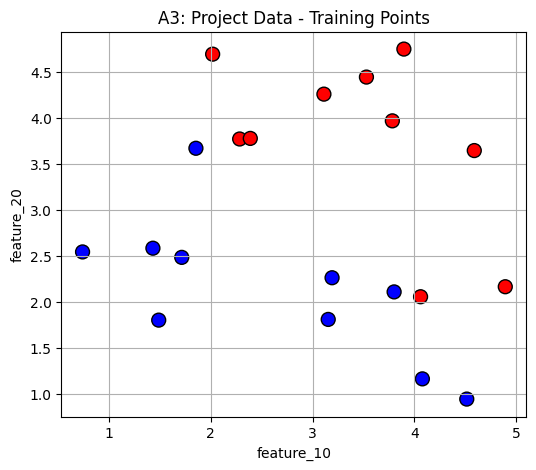

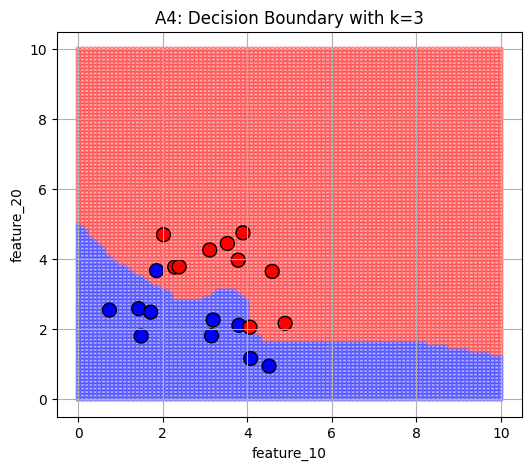

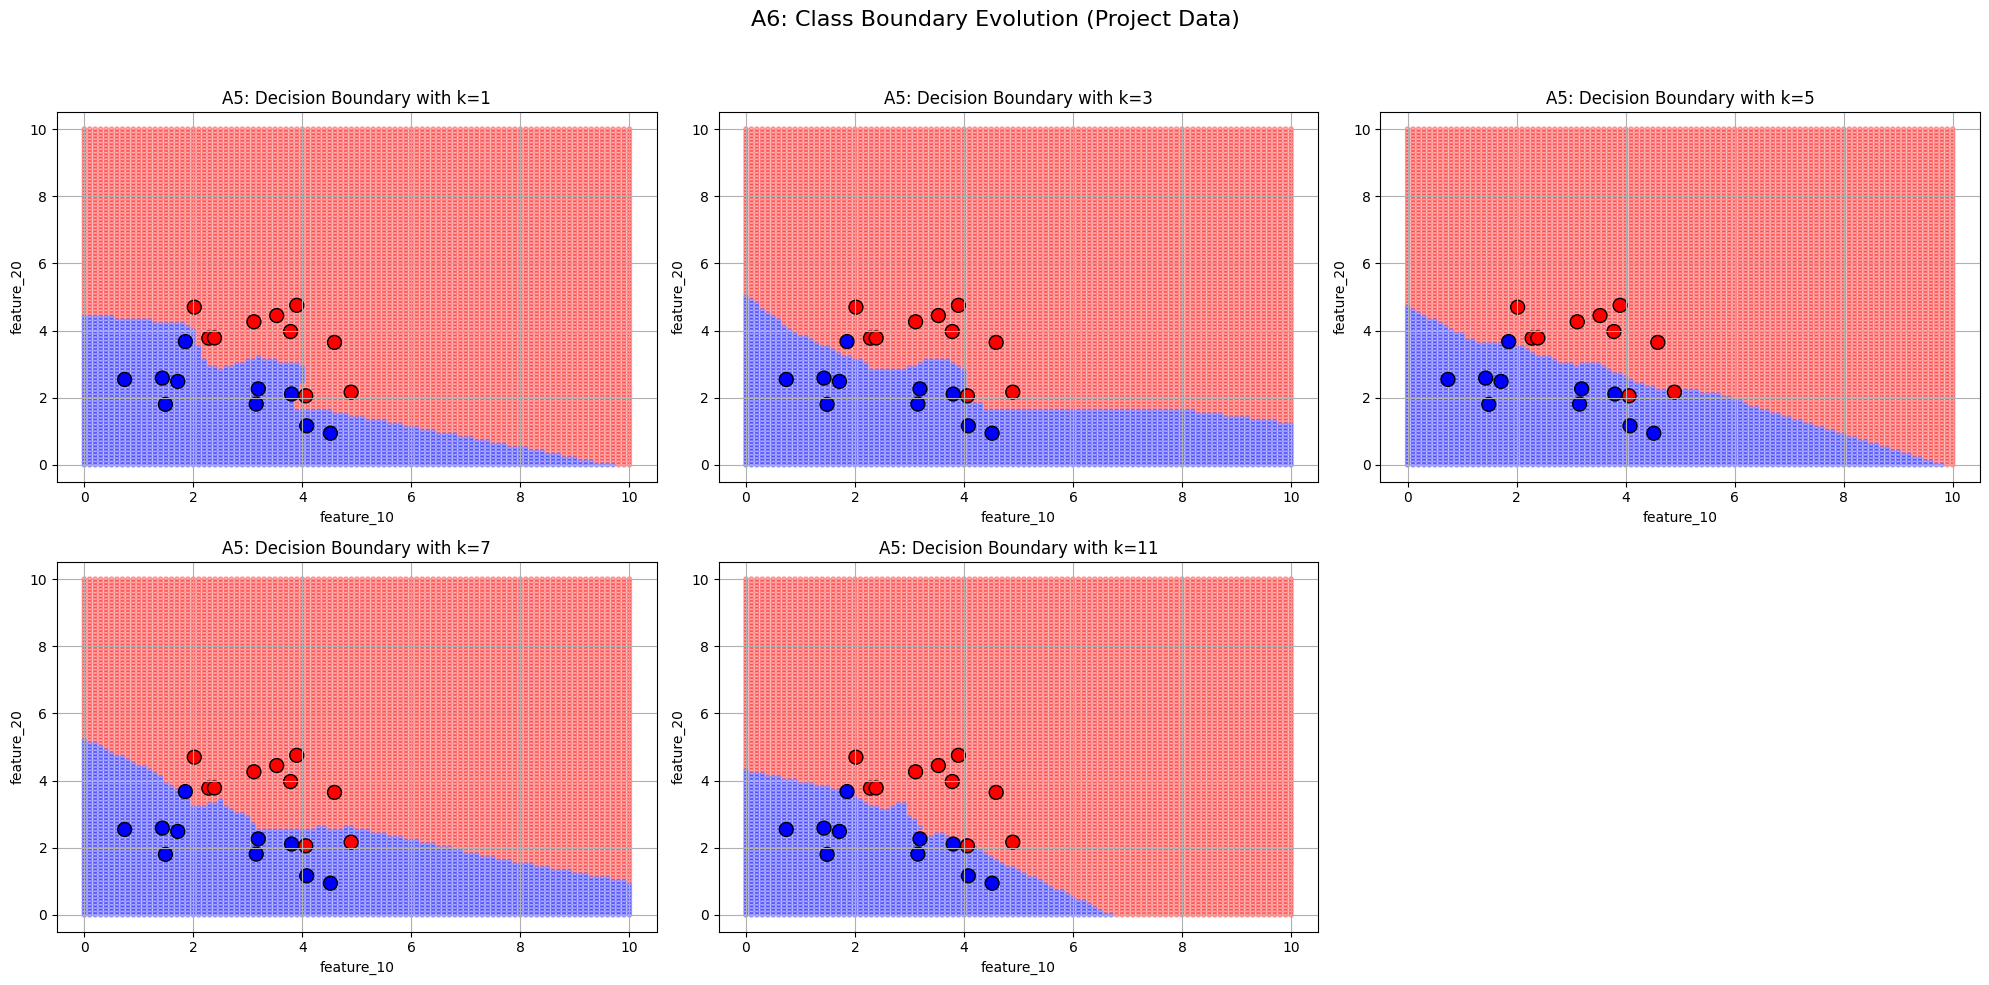

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df = pd.read_csv("structured_dataset.csv")

# Select any two features (e.g., feature_10 and feature_20)
feature_x = 'feature_10'
feature_y = 'feature_20'

# Drop rows with missing values in selected features
df_clean = df[[feature_x, feature_y]].dropna()

# Sample 20 training points
train_data = df_clean.sample(n=20, random_state=42).reset_index(drop=True)

# Assign class label: Class 1 if (x + y) > threshold, else Class 0
threshold = train_data[feature_x].mean() + train_data[feature_y].mean()
train_data['Class'] = ((train_data[feature_x] + train_data[feature_y]) > threshold).astype(int)

X_train = train_data[[feature_x, feature_y]].values
y_train = train_data['Class'].values

# A3: Scatter plot of training data
plt.figure(figsize=(6, 5))
colors = ['blue' if c == 0 else 'red' for c in y_train]
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, edgecolor='black', s=100)
plt.title("A3: Project Data - Training Points")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.grid(True)
plt.show()

# A4: Generate test points in range 0–10 with step 0.1
x_vals = np.arange(0, 10.1, 0.1)
y_vals = np.arange(0, 10.1, 0.1)
xx, yy = np.meshgrid(x_vals, y_vals)
test_points = np.c_[xx.ravel(), yy.ravel()]

# Train kNN model with k=3 and predict
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred_classes = knn.predict(test_points)

# A4: Plot test predictions with class colors
plt.figure(figsize=(6, 5))
plt.scatter(test_points[:, 0], test_points[:, 1], c=np.where(pred_classes == 0, 'blue', 'red'), alpha=0.3, s=10)
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, edgecolor='black', s=100)
plt.title("A4: Decision Boundary with k=3")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.grid(True)
plt.show()

# A5: Repeat for multiple k values
k_values = [1, 3, 5, 7, 11]
plt.figure(figsize=(20, 10))
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(test_points)

    plt.subplot(2, 3, i + 1)
    plt.scatter(test_points[:, 0], test_points[:, 1], c=np.where(pred_k == 0, 'blue', 'red'), alpha=0.3, s=10)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, edgecolor='black', s=100)
    plt.title(f"A5: Decision Boundary with k={k}")
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.grid(True)

plt.suptitle("A6: Class Boundary Evolution (Project Data)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

A7.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("structured_dataset.csv")

# Select two features for simplicity
feature_x = 'feature_10'
feature_y = 'feature_20'

# Clean data
df_clean = df[[feature_x, feature_y, 'PPPF']].dropna()

# Convert PPPF to binary classification (low/high)
df_clean['PPPF_Class'] = pd.qcut(df_clean['PPPF'], q=2, labels=[0, 1])

X = df_clean[[feature_x, feature_y]].values
y = df_clean['PPPF_Class'].astype(int).values

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define kNN model
knn = KNeighborsClassifier()

# Define hyperparameter space
param_grid = {'n_neighbors': list(range(1, 21))}

# GridSearchCV setup
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best result
print("Best k value found:", grid_search.best_params_['n_neighbors'])
print("Best CV accuracy score:", grid_search.best_score_)

# Evaluate on test set using best k
best_k = grid_search.best_params_['n_neighbors']
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
test_accuracy = best_knn.score(X_test_scaled, y_test)
print(f"Test accuracy using best k ({best_k}): {test_accuracy:.4f}")


Best k value found: 19
Best CV accuracy score: 0.5517590269212777
Test accuracy using best k (19): 0.5533
